In [1]:
#Libraries
import pandas as pd
import numpy as np
import re

In [2]:
#Reading and creating a df 
shark_df = pd.read_csv('attacks.csv', sep=',', encoding='ISO-8859-1')

In [3]:
#First of all we are going to get rid of the values in column 'injuries' where attacks are not documented, 
# because we dont know what happened
ds_droped = shark_df.copy()
ds_droped.dropna(subset = ['Injury'], inplace=True)

In [4]:
#Cleaning columns 'case_number', 'Case Number.1', and 'Case Number.2'  by keeping only the number of attack by day    
def case_n(x):
    b = str(x)
    a = b.split('.')
    t = 0
    for i in a:
        if i == 'b':
            t = 2
        elif i == 'c':
            t = 3
        elif i == 'd':
            t = 4
        elif i == 'e': 
            t = 5
        elif i == 'f':
            t = 6
        else:
            t = 1
    return t
ds_droped['Case Number']=ds_droped['Case Number'].apply(case_n)

In [5]:
#Cleaning col 'Date'  word in the df, dates like 'Sep-2017' or 'Reported ...' 
ds_dr_date = ds_droped.copy()
def  Eliminate_w(y):
    x = str(y)
    match_1 = re.search(r'(\d{2}-\w*[A-z]-\d{4})',x)
    match_2 = re.search(r'(\w*[A-z]-\d{4})',x)
    match_3 = re.search(r'(\d{4})',x)
    if match_1:
        return ''.join(re.findall(r'(\d{2}-\w*[A-z]-\d{4})',x))
    elif match_2:
        return ''.join(re.findall(r'(\w*[A-z]-\d{4})',x))
    elif match_3:
        return ''.join(re.findall(r'(\d{4})',x))
    else:
        return 'unk'
    
    return    
ds_dr_date['Date']=ds_dr_date.Date.apply(Eliminate_w)

In [6]:
#Next column to clean "location", by keeping only first name of the place, Area Nan = Unknown
ds_dr_loc = ds_dr_date.copy()
ds_dr_loc.Area.fillna('Unk', inplace = True)
ds_dr_loc['Location']=ds_dr_loc.Location.apply(lambda x: str(x).split(',')[0])
ds_dr_loc['Location'].fillna('Unk',inplace = True)

In [7]:
#Next column "names" for us names are indifferent to everything is set to be x and filling Unknown activities
ds_dr_loc.Activity.fillna('Unk',inplace = True)
ds_dr_loc['Sex '].fillna('Unk',inplace = True)
ds_dr_loc.Name = 'x'

In [8]:
#Getting rid of bad char like '40s' or 3215149789 or aberrations 
ds_dr_age = ds_dr_loc.copy()
def only_num(x):
    match_1 = re.search(r'(\d{1,2})',str(x))
    if match_1:
        if len(str(x)) < 3:
            return int(''.join(re.findall(r'(\d{1,2})',str(x))))
        else:
            return np.nan
    else:
        return np.nan
ds_dr_age['Age'] = ds_dr_age['Age'].apply(only_num)
#Filling NaN with average age
ds_dr_age['Age'].fillna(int(ds_dr_age['Age'].mean()), inplace = True)

In [9]:
#Next col "attack", clasificate injury with yes, not or Fatal 
ds_dr_inj = ds_dr_age.copy() 
def injuri_yn(x):
    x = str(x)
    match = re.search(r'\bno injury\b|\bno\b',x.lower())
    match2 = re.search(r'\bfatal\b',x.lower())
    if match:
        return 'No'
    elif match2:
        return 'Fatal'
    else:
        return 'Yes'
ds_dr_inj['Injury'] = ds_dr_inj['Injury'].apply(injuri_yn)

In [10]:
#next column  'time' filling values with day or night 
ds_dr_tim = ds_dr_inj.copy()
def times(x):
    x = str(x)
    day = re.search(r'\b(\w*morning\w*)\b|\b(\w*afternoon\w*)\b|\b(\w*midday\w*)\b|\b(\w*day\w*)\b',x.lower())
    night = re.search(r'\b(\w*night\w*)\b|\b(\w*dusk\w*)\b|\b(\w*evening\w*)\b',x.lower())
    b = x.split('h')
    bad_val = re.search(r'(\d{2})',b[0])
    if day:
        return 'day'
    elif night:
        return 'night'
    elif (len(b[0]) <= 2 and bad_val):
        if (int(b[0]) >= 5 and int(b[0]) < 18):
            return 'day'
        elif (int(b[0]) >= 18 or int(b[0]) < 5):
            return 'night'
    else:
        return 'unk'
ds_dr_tim['Time'] = ds_dr_tim['Time'].apply(times)

In [11]:
#Next column species based on most common: white, tiger, lemon, bull, nurse, grey, blue, ragged, wobbegong, unknown.
ds_dr_spe = ds_dr_tim.copy() 
def shar_spec(x):
    x = str(x)
    if re.search(r'\b(\w*white\w*)\b',x.lower()):
        return 'White'
    elif re.search(r'\b(\w*tige\w*)\b',x.lower()):
        return 'Tiger'
    elif re.search(r'\b(\w*lemo\w*)\b',x.lower()):
        return 'Lemon'
    elif re.search(r'\b(\w*bul\w*)\b',x.lower()):
        return 'Bull'
    elif re.search(r'\b(\w*nurs\w*)\b',x.lower()):
        return 'Nurse'
    elif re.search(r'\b(\w*gre\w*)\b',x.lower()):
        return 'Grey'
    elif re.search(r'\b(\w*blu\w*)\b',x.lower()):
        return 'Blue'
    elif re.search(r'\b(\w*ragge\w*)\b',x.lower()):
        return 'Ragged'
    elif re.search(r'\b(\w*wobbeg\w*)\b',x.lower()):
        return 'Wobbegong'
    else:
        return 'Other'
    
ds_dr_spe['Species '] = ds_dr_spe['Species '].apply(shar_spec)
    

In [12]:
# Next column investigator or source we only want to keep one name
ds_dr_inv = ds_dr_spe.copy()
ds_dr_inv['Investigator or Source']=ds_dr_inv['Investigator or Source'].apply(lambda x: re.sub('[0-9]+[\/,:][0-9]{2}[\/,:][0-9]{2,4}','',str(x).split(',')[0]))
ds_dr_inv['Investigator or Source']=ds_dr_inv['Investigator or Source'].apply(lambda x: re.sub('[0-9]+[\/,:][0-9]{2}[\/,:][0-9]{2,4}','',str(x).split(';')[0]))

In [13]:
#next column 'pdf' we only want the name of the pdf file    
ds_dr_pdf = ds_dr_inv.copy()
ds_dr_pdf['pdf']=ds_dr_pdf['pdf'].apply(lambda x: ''.join(re.findall(r'[A-z]+[\.]+pdf',str(x))))
ds_dr_pdf['pdf'].replace('', 'Unk', inplace=True)

In [14]:
#next column 'href formula' we keep only the 1° directori after the page
ds_dr_ref = ds_dr_pdf.copy()
ds_dr_ref['href formula'] = ds_dr_ref['href formula'].apply(lambda x: ''.join(re.findall(r'/[a-z]+/', str(x))))
ds_dr_ref['href formula'] = ds_dr_ref['href formula'].apply(lambda x: ''.join(re.sub(r'/','',str(x))))

In [15]:
#next column 'href' we keep the id dir
ds_df_href = ds_dr_ref.copy() 
ds_df_href['href']=ds_df_href['href'].apply(lambda x: ''.join(re.findall(r'[A-z]+[\.]+net',str(x)))) 

In [16]:
#next column 'Case Number.1' and 'Case Number.1' same formula as the used on firs step 'case number' case_n
ds_df_case = ds_df_href.copy()
ds_df_case['Case Number.1'] = ds_df_case['Case Number.1'].apply(case_n)
ds_df_case

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,1,25-Jun-2018,2018.0,Boating,USA,California,Oceanside,Paddling,x,F,...,White,R. Collier,Wolfe.pdf,spreadsheets,sharkattackfile.net,1,2018.06.25,6303.0,NaN,NaN
1,1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,St. Simon Island,Standing,x,F,...,Other,K.McMurray,McNeely.pdf,spreadsheets,sharkattackfile.net,1,2018.06.18,6302.0,NaN,NaN
2,1,09-Jun-2018,2018.0,Invalid,USA,Hawaii,Habush,Surfing,x,M,...,Other,K.McMurray,Denges.pdf,spreadsheets,sharkattackfile.net,1,2018.06.09,6301.0,NaN,NaN
3,1,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,x,M,...,Other,B. Myatt,Arrawarra.pdf,spreadsheets,sharkattackfile.net,1,2018.06.08,6300.0,NaN,NaN
4,1,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,x,M,...,Tiger,A .Kipper,Ramos.pdf,spreadsheets,sharkattackfile.net,1,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,1,1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,x,M,...,Other,H. Taunton,RoebuckBay.pdf,spreadsheets,sharkattackfile.net,1,ND.0005,6.0,NaN,NaN
6298,1,1903,0.0,Unprovoked,AUSTRALIA,Western Australia,nan,Pearl diving,x,M,...,Other,H. Taunton,Ahmun.pdf,spreadsheets,sharkattackfile.net,1,ND.0004,5.0,NaN,NaN
6299,1,19001905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,x,M,...,Other,F. Schwartz,Unk,spreadsheets,sharkattackfile.net,1,ND.0003,4.0,NaN,NaN
6300,1,18831889,0.0,Unprovoked,PANAMA,Unk,Panama Bay 8ºN,Unk,x,M,...,Other,The Sun,JulesPatterson.pdf,spreadsheets,sharkattackfile.net,1,ND.0002,3.0,NaN,NaN


In [17]:
def g(x):
    l = re.findall(r'(\d{1,4})',str(x)) 
    return int(''.join(l[0]))
ds_df_case['Case Number.2'] = ds_df_case['Case Number.2'].apply(g)
ds_df_case['Case Number.2']

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
6297       5
6298       4
6299       3
6300       2
6301       1
Name: Case Number.2, Length: 6274, dtype: int64

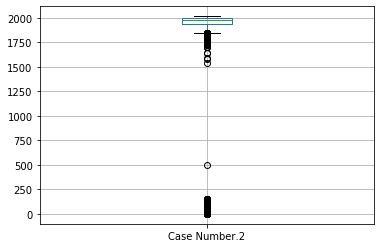

In [18]:
%matplotlib inline
ds_df_case[['Case Number.2']].boxplot()

In [19]:
#we will delete values less than 1700 because the graphics are spilled before that
ds_df_case2 = ds_df_case.copy()
def g(x):
    if len(str(x)) > 3 and int(str(x))> 1700:
        return x
    else:
        return np.nan
ds_df_case2['Case Number.2'] = ds_df_case2['Case Number.2'].apply(g)
ds_df_case2.dropna(subset = ['Case Number.2'], inplace=True)


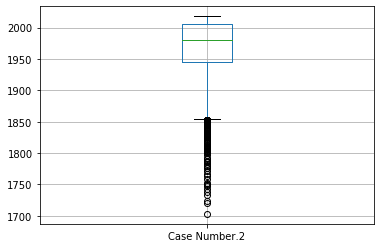

In [20]:
ds_df_case2[['Case Number.2']].boxplot()

In [21]:
# Case Number.2 and year should have same values also year is redundant with Date
ds_df_case2['Year'] = ds_df_case2['Case Number.2'] 
ds_df_case2

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,1,25-Jun-2018,2018.0,Boating,USA,California,Oceanside,Paddling,x,F,...,White,R. Collier,Wolfe.pdf,spreadsheets,sharkattackfile.net,1,2018.0,6303.0,NaN,NaN
1,1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,St. Simon Island,Standing,x,F,...,Other,K.McMurray,McNeely.pdf,spreadsheets,sharkattackfile.net,1,2018.0,6302.0,NaN,NaN
2,1,09-Jun-2018,2018.0,Invalid,USA,Hawaii,Habush,Surfing,x,M,...,Other,K.McMurray,Denges.pdf,spreadsheets,sharkattackfile.net,1,2018.0,6301.0,NaN,NaN
3,1,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,x,M,...,Other,B. Myatt,Arrawarra.pdf,spreadsheets,sharkattackfile.net,1,2018.0,6300.0,NaN,NaN
4,1,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,x,M,...,Tiger,A .Kipper,Ramos.pdf,spreadsheets,sharkattackfile.net,1,2018.0,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6157,1,1733,1733.0,Invalid,ICELAND,Bardestrand,Talkknefiord,Unk,x,Unk,...,Other,E. Olafsen,Iceland.pdf,spreadsheets,sharkattackfile.net,1,1733.0,146.0,NaN,NaN
6158,1,1723,1723.0,Unprovoked,ROATAN,Unk,nan,Unk,x,M,...,Other,C.Moore,Ashton.pdf,spreadsheets,sharkattackfile.net,1,1723.0,145.0,NaN,NaN
6159,1,1721,1721.0,Unprovoked,ITALY,Sardinia,Ponte della Maddelena,Swimming,x,M,...,White,F. Ricciardi,Maddalena.pdf,spreadsheets,sharkattackfile.net,1,1721.0,144.0,NaN,NaN
6160,1,26-Mar-1703,1703.0,Unprovoked,BARBADOS,Southwest coast,Carlisle Bay,Swimming,x,M,...,Other,W.R.Cutter,Jennings.pdf,spreadsheets,sharkattackfile.net,1,1703.0,143.0,NaN,NaN


In [22]:
python_cleaning_shark = ds_df_case2.copy() 
python_cleaning_shark.to_csv(r'Project_cleaning_shark.csv', index = False)